In [1]:
#import necessary dependencies
import pandas as pd
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

In [2]:
#import the scrubbed restaurant data
restaurants_raw = pd.read_csv('../Data (Clean)/clean_data_all_restaurants.csv')
restaurants_raw.head()

,Unnamed: 0,Inspection Date,Address,City,Facility ID,Restaurant,State,Zip,Cuisine,Grade,Active Business,Latitude,Longitude,Type,Price,Rating,Inspection ID,# of Reviews,Score,Yelp ID
0,13750,03/30/2018 12:00:00 AM,1972 HILLHURST AVE,LOS ANGELES,FA0258145,SUSHI AI,CA,90027,"['Sushi Bars', 'Japanese']",A,False,34.107347,-118.287275,RESTAURANT (31-60) SEATS HIGH RISK,$$,4.5,PR0208131,36,90,J5OiWmshzD9Xf4NusZvhjA
1,13792,03/29/2018 12:00:00 AM,5611 FIGUEROA ST STE 211,LOS ANGELES,FA0258144,HOMESTATE,CA,90042,"['Tex-Mex', 'Tacos', 'Breakfast & Brunch']",A,False,34.109420,-118.193830,RESTAURANT (31-60) SEATS HIGH RISK,$$,4.0,PR0208130,91,96,iBN17PY_Bd7uW8qWgjv-ww
2,13743,03/30/2018 12:00:00 AM,9840 NATIONAL BLVD,LOS ANGELES,FA0258138,K&A CATON CHINESE REST.,CA,90034,['Chinese'],A,False,34.031150,-118.400895,RESTAURANT (31-60) SEATS HIGH RISK,$,3.0,PR0208124,143,90,D9R0ynjo-hu7hnLEiWB7fA
3,13720,03/30/2018 12:00:00 AM,929 W JEFFERSON BLVD,LOS ANGELES,FA0258130,KOBUNGA KOREAN GRILL,CA,90089,"['Korean', 'Barbeque']",A,False,34.025032,-118.285650,RESTAURANT (0-30) SEATS HIGH RISK,$$,4.0,PR0208117,50,97,8RXJiao_twvDmzDAqwkw6w
4,13887,03/28/2018 12:00:00 AM,11955 W WASHINGTON BLVD STE 1,LOS ANGELES,FA0257995,WALL STREET PIZZA,CA,90066,['Pizza'],A,False,33.998007,-118.421494,RESTAURANT (0-30) SEATS HIGH RISK,$$,3.0,PR0207952,44,91,aL1wiQCuDn9T-UkvOrmncQ


In [3]:
restaurants_raw['bucket'] = pd.cut(restaurants_raw['Rating'], [0, 2, 3, 4, 5, 6], right=False, labels=['1 Star', '2 Star', '3 Star', '4 Star', '5 Star'])
restaurants_raw.head()

,Unnamed: 0,Inspection Date,Address,City,Facility ID,Restaurant,State,Zip,Cuisine,Grade,...,Latitude,Longitude,Type,Price,Rating,Inspection ID,# of Reviews,Score,Yelp ID,bucket
0,13750,03/30/2018 12:00:00 AM,1972 HILLHURST AVE,LOS ANGELES,FA0258145,SUSHI AI,CA,90027,"['Sushi Bars', 'Japanese']",A,...,34.107347,-118.287275,RESTAURANT (31-60) SEATS HIGH RISK,$$,4.5,PR0208131,36,90,J5OiWmshzD9Xf4NusZvhjA,4 Star
1,13792,03/29/2018 12:00:00 AM,5611 FIGUEROA ST STE 211,LOS ANGELES,FA0258144,HOMESTATE,CA,90042,"['Tex-Mex', 'Tacos', 'Breakfast & Brunch']",A,...,34.109420,-118.193830,RESTAURANT (31-60) SEATS HIGH RISK,$$,4.0,PR0208130,91,96,iBN17PY_Bd7uW8qWgjv-ww,4 Star
2,13743,03/30/2018 12:00:00 AM,9840 NATIONAL BLVD,LOS ANGELES,FA0258138,K&A CATON CHINESE REST.,CA,90034,['Chinese'],A,...,34.031150,-118.400895,RESTAURANT (31-60) SEATS HIGH RISK,$,3.0,PR0208124,143,90,D9R0ynjo-hu7hnLEiWB7fA,3 Star
3,13720,03/30/2018 12:00:00 AM,929 W JEFFERSON BLVD,LOS ANGELES,FA0258130,KOBUNGA KOREAN GRILL,CA,90089,"['Korean', 'Barbeque']",A,...,34.025032,-118.285650,RESTAURANT (0-30) SEATS HIGH RISK,$$,4.0,PR0208117,50,97,8RXJiao_twvDmzDAqwkw6w,4 Star
4,13887,03/28/2018 12:00:00 AM,11955 W WASHINGTON BLVD STE 1,LOS ANGELES,FA0257995,WALL STREET PIZZA,CA,90066,['Pizza'],A,...,33.998007,-118.421494,RESTAURANT (0-30) SEATS HIGH RISK,$$,3.0,PR0207952,44,91,aL1wiQCuDn9T-UkvOrmncQ,3 Star


In [4]:
#build a dataframe of value counts by ratings in order to build a pie
total_ratings = pd.DataFrame(restaurants_raw['bucket'].value_counts()).reset_index()
total_ratings['color'] = ""
total_ratings['color'][total_ratings['index'].str.contains("5")] = 'darkseagreen'
total_ratings['color'][total_ratings['index'].str.contains('4')] = 'lightcyan'
total_ratings['color'][total_ratings['index'].str.contains('3')] = 'lightslategray'
total_ratings['color'][total_ratings['index'].str.contains('2')] = 'peachpuff'
total_ratings['color'][total_ratings['index'].str.contains('1')] = 'lemonchiffon'
total_ratings

,index,bucket,color
0,4 Star,15129,lightcyan
1,3 Star,12860,lightslategray
2,2 Star,4169,peachpuff
3,5 Star,1079,darkseagreen
4,1 Star,863,lemonchiffon


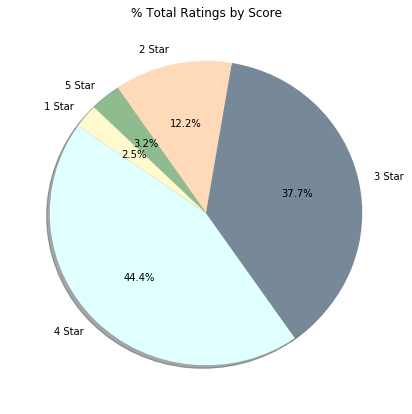

In [5]:
#use the dataframe to build a pie chart
plt.figure(figsize = (7, 7))
plt.pie(total_ratings['bucket'],
       labels = total_ratings['index'],
        colors = total_ratings['color'],
       autopct="%1.1f%%",
       shadow=True, 
        startangle=145)
plt.title("% Total Ratings by Score")
#save figure
plt.savefig('../Images/rating_counts.jpg')

# show plot
plt.show()

In [6]:
pie_grades = pd.DataFrame(restaurants_raw.groupby('Grade')['bucket'].value_counts())
pie_grades = pie_grades.unstack()
pie_grades.columns = pie_grades.columns.get_level_values(1)
pie_grades

bucket,1 Star,2 Star,3 Star,4 Star,5 Star
Grade,,,,,
,NaN,NaN,NaN,1.0,NaN
A,811.0,3860.0,11675.0,13967.0,982.0
B,50.0,293.0,1083.0,1078.0,90.0
C,2.0,16.0,102.0,83.0,7.0


In [7]:
#isolate the A grade restaurants in their own dataframe
a_grades = pd.DataFrame(pie_grades.loc['A']).reset_index()
a_grades['color'] = ""
a_grades['color'][a_grades['bucket'].str.contains("5")] = 'darkseagreen'
a_grades['color'][a_grades['bucket'].str.contains('4')] = 'lightcyan'
a_grades['color'][a_grades['bucket'].str.contains('3')] = 'lightslategray'
a_grades['color'][a_grades['bucket'].str.contains('2')] = 'peachpuff'
a_grades['color'][a_grades['bucket'].str.contains('1')] = 'lemonchiffon'
a_grades

,bucket,A,color
0,1 Star,811.0,lemonchiffon
1,2 Star,3860.0,peachpuff
2,3 Star,11675.0,lightslategray
3,4 Star,13967.0,lightcyan
4,5 Star,982.0,darkseagreen


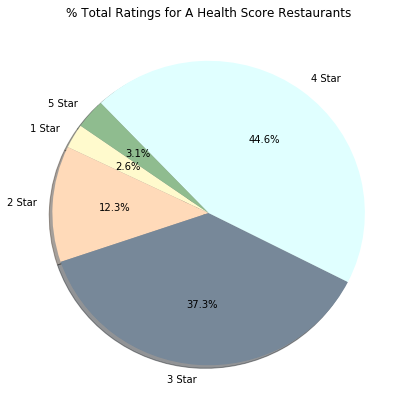

In [8]:
#use the dataframe to build a pie chart
plt.figure(figsize = (7, 7))
plt.pie(a_grades['A'],
       labels = a_grades['bucket'],
        colors = a_grades['color'],
       autopct="%1.1f%%",
       shadow=True, 
        startangle=145)
plt.title("% Total Ratings for A Health Score Restaurants")
#save figure
plt.savefig('../Images/A_rating_counts.jpg')

# show plot
plt.show()

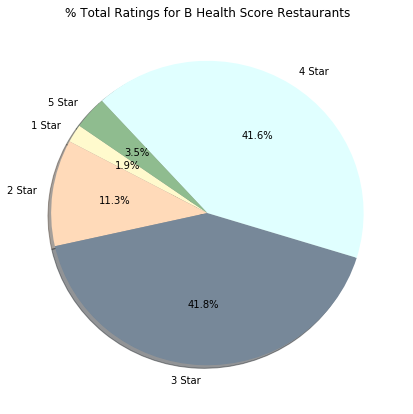

In [9]:
#isolate the B grade restaurants in their own dataframe
b_grades = pd.DataFrame(pie_grades.loc['B']).reset_index()
b_grades['color'] = ""
b_grades['color'][b_grades['bucket'].str.contains("5")] = 'darkseagreen'
b_grades['color'][b_grades['bucket'].str.contains('4')] = 'lightcyan'
b_grades['color'][b_grades['bucket'].str.contains('3')] = 'lightslategray'
b_grades['color'][b_grades['bucket'].str.contains('2')] = 'peachpuff'
b_grades['color'][b_grades['bucket'].str.contains('1')] = 'lemonchiffon'
b_grades

#use the dataframe to build a pie chart
plt.figure(figsize = (7, 7))
plt.pie(b_grades['B'],
       labels = b_grades['bucket'],
        colors = b_grades['color'],
       autopct="%1.1f%%",
       shadow=True, 
        startangle=145)
plt.title("% Total Ratings for B Health Score Restaurants")
#save figure
plt.savefig('../Images/B_rating_counts.jpg')

# show plot
plt.show()

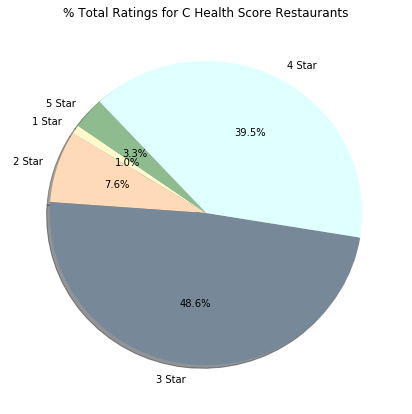

In [10]:
#isolate the C grade restaurants in their own dataframe
c_grades = pd.DataFrame(pie_grades.loc['C']).reset_index()
c_grades['color'] = ""
c_grades['color'][c_grades['bucket'].str.contains("5")] = 'darkseagreen'
c_grades['color'][c_grades['bucket'].str.contains('4')] = 'lightcyan'
c_grades['color'][c_grades['bucket'].str.contains('3')] = 'lightslategray'
c_grades['color'][c_grades['bucket'].str.contains('2')] = 'peachpuff'
c_grades['color'][c_grades['bucket'].str.contains('1')] = 'lemonchiffon'
c_grades

#use the dataframe to build a pie chart
plt.figure(figsize = (7, 7))
plt.pie(c_grades['C'],
       labels = c_grades['bucket'],
        colors = c_grades['color'],
       autopct="%1.1f%%",
       shadow=True, 
        startangle=145)
plt.title("% Total Ratings for C Health Score Restaurants")
#save figure
plt.savefig('../Images/C_rating_counts.jpg')

# show plot
plt.show()